In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


In [2]:
# Generate random latitude and longitude values
latitudes = np.random.uniform(low=-90.0, high=90.0, size=1500)
longitudes = np.random.uniform(low=-180.0, high=180.0, size=1500)

# Combine into coordinate pairs
coordinates = list(zip(latitudes, longitudes))

cities = []
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then add it to the cities list
    if city not in cities:
        cities.append(city)

In [3]:
# API call
api_keys = weather_api_key
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
city_data = []


In [4]:
# Loop through the list of cities and perform a request for data on each
for i, city in enumerate(cities):
    query_url = f"{url}appid={api_keys}&q={city}&units={units}"
    response = requests.get(query_url).json()
    try:
        city_data.append({
            "City": response["name"],
            "Lat": response["coord"]["lat"],
            "Lng": response["coord"]["lon"],
            "Max Temp": response["main"]["temp_max"],
            "Humidity": response["main"]["humidity"],
            "Cloudiness": response["clouds"]["all"],
            "Wind Speed": response["wind"]["speed"],
            "Country": response["sys"]["country"],
            "Date": response["dt"]
        })
        print(f"Processing Record {i} | {city}")
    except:
        print("City not found. Skipping...")
        pass

Processing Record 0 | invercargill
Processing Record 1 | margaret river
Processing Record 2 | lebu
Processing Record 3 | albany
Processing Record 4 | edinburgh of the seven seas
Processing Record 5 | puerto ayora
Processing Record 6 | lorengau
Processing Record 7 | cidreira
Processing Record 8 | ciudad lazaro cardenas
Processing Record 9 | hirara
Processing Record 10 | ilulissat
Processing Record 11 | fort bragg
Processing Record 12 | encheng
Processing Record 13 | saipan
Processing Record 14 | port-aux-francais
Processing Record 15 | san patricio
Processing Record 16 | camana
Processing Record 17 | adamstown
Processing Record 18 | zuya
Processing Record 19 | beyla
Processing Record 20 | tiksi
Processing Record 21 | novyy urengoy
Processing Record 22 | waitangi
Processing Record 23 | colonia
Processing Record 24 | ulladulla
Processing Record 25 | lihue
Processing Record 26 | codrington
Processing Record 27 | iskateley
Processing Record 28 | la ronge
Processing Record 29 | vorgashor
Pro

In [5]:
# Create a DataFrame
weather_df = pd.DataFrame(city_data)
weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Invercargill,-46.4000,168.3500,55.02,54,79,8.99,NZ,1728958685
1,Margaret River,-33.9500,115.0667,60.51,57,73,8.46,AU,1728958685
2,Lebu,-37.6167,-73.6500,48.65,91,13,11.18,CL,1728958685
3,Albany,42.6001,-73.9662,41.63,69,81,1.01,US,1728958685
4,Edinburgh of the Seven Seas,-37.0676,-12.3116,52.07,76,100,21.23,SH,1728958685


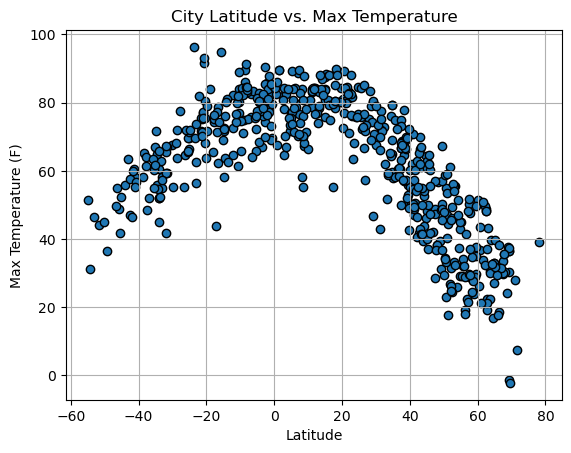

In [6]:
# City Latitude vs. Max Temperature
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], edgecolors="black")
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)
plt.show()

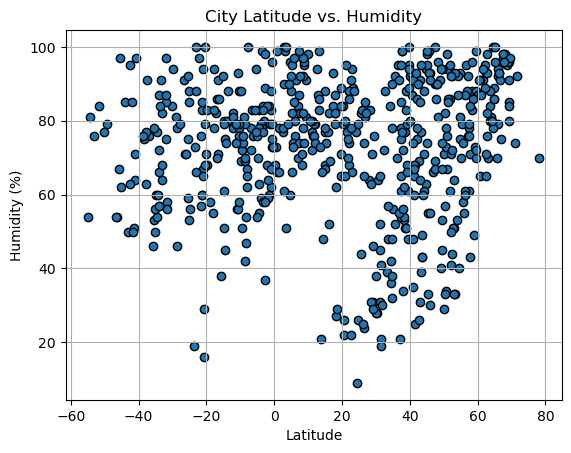

In [7]:
# Latitude vs. Humidity
plt.scatter(weather_df["Lat"], weather_df["Humidity"], edgecolors="black")
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)
plt.show()

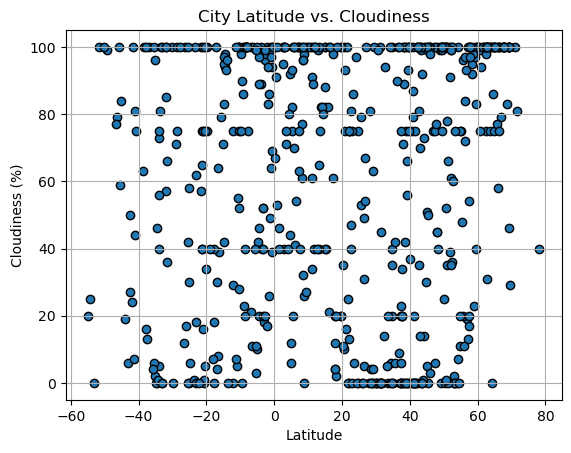

In [8]:
#Latitude vs. Cloudiness
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], edgecolors="black")
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)
plt.show()

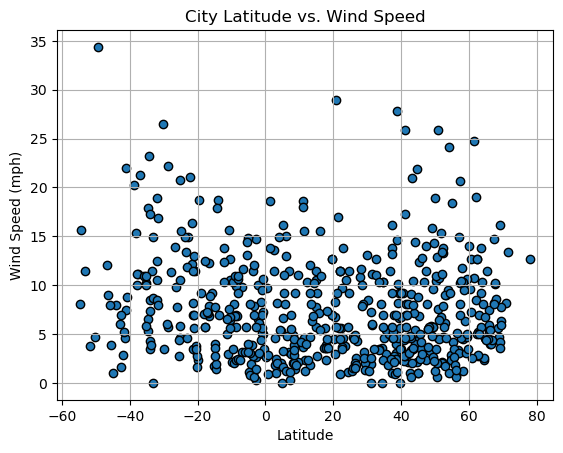

In [9]:
# Latitude vs. Wind Speed
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], edgecolors="black")
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)
plt.show()


In [10]:
def plot_linear_regression(x_values, y_values, title, xlabel, ylabel):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
    
    # Generate regression line values
    regress_values = x_values * slope + intercept
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
    
    # Create scatter plot and regression line
    plt.scatter(x_values, y_values, edgecolors="black")
    plt.plot(x_values, regress_values, "r-")
    
    # Add labels, title, and equation
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.annotate(line_eq, (min(x_values), min(y_values)), fontsize=12, color="red")
    plt.grid(True)
    
    # Display R² value
    print(f"R² = {r_value**2:.4f}")
    plt.show()


In [11]:
#Data Separated by Hemisphere
northern_hemisphere = weather_df.loc[weather_df["Lat"] >= 0]
southern_hemisphere = weather_df.loc[weather_df["Lat"] < 0]

R² = 0.7388


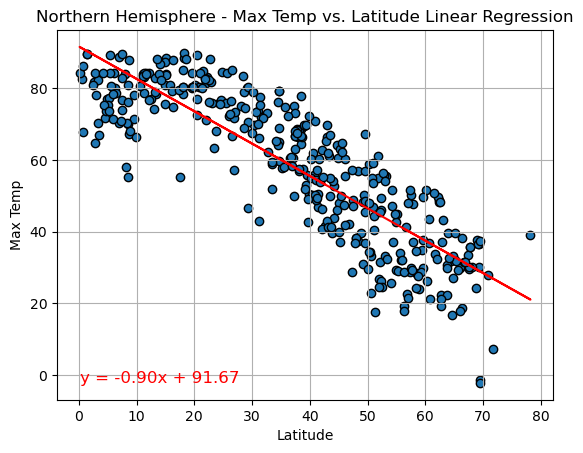

In [12]:
#Temperature (F) vs. Latitude Linear Regression - Northern Hemisphere
plot_linear_regression(northern_hemisphere["Lat"], northern_hemisphere["Max Temp"], "Northern Hemisphere - Max Temp vs. Latitude Linear Regression", "Latitude", "Max Temp")
#Analysis
#The linear regression model for the Northern Hemisphere shows a strong negative correlation between latitude and temperature. As latitude increases, temperature decreases.

R² = 0.5996


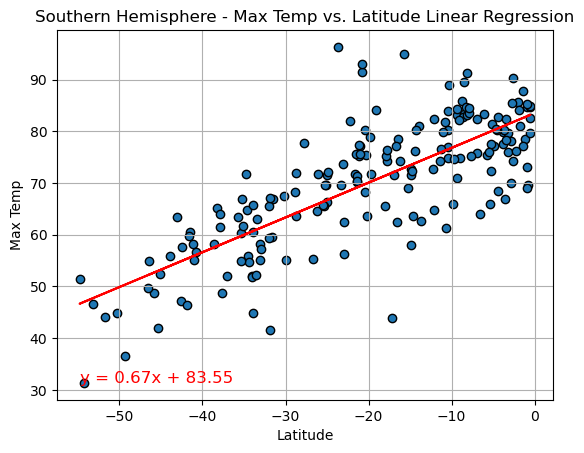

In [13]:
##Temperature (F) vs. Latitude Linear Regression - Southern Hemisphere
plot_linear_regression(southern_hemisphere["Lat"], southern_hemisphere["Max Temp"], "Southern Hemisphere - Max Temp vs. Latitude Linear Regression", "Latitude", "Max Temp")
#Analysis
#The linear regression model for the Southern Hemisphere shows a moderate positive correlation between latitude and temperature. As latitude increases, temperature also increases.


R² = 0.0061


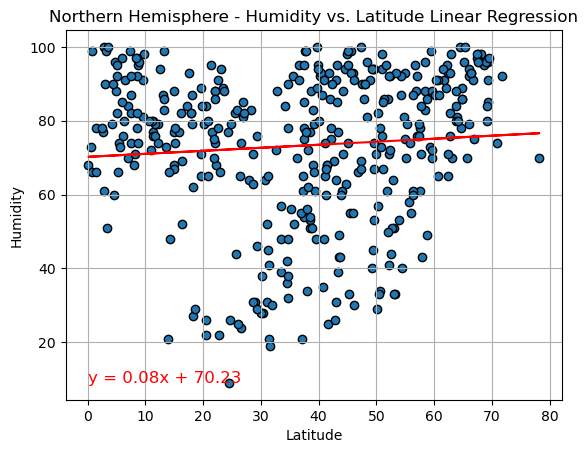

In [14]:
#Humidity (%) vs. Latitude Linear Regression Northern Hemisphere
plot_linear_regression(northern_hemisphere["Lat"], northern_hemisphere["Humidity"], "Northern Hemisphere - Humidity vs. Latitude Linear Regression", "Latitude", "Humidity")
#Analysis
#The linear regression model for the Northern Hemisphere shows no correlation between latitude and humidity.


R² = 0.0042


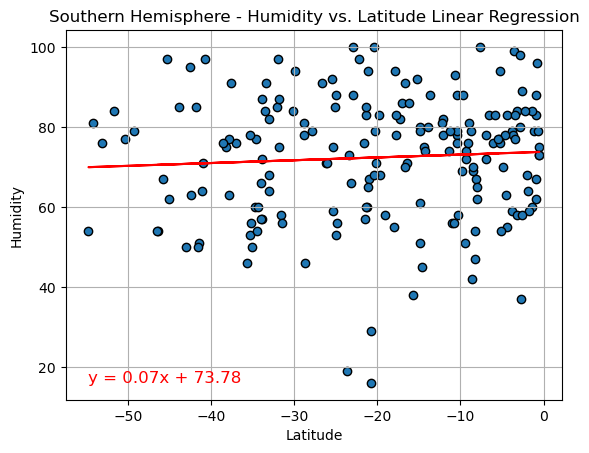

In [15]:
#Humidity (%) vs. Latitude Linear Regression - Southern Hemisphere
plot_linear_regression(southern_hemisphere["Lat"], southern_hemisphere["Humidity"], "Southern Hemisphere - Humidity vs. Latitude Linear Regression", "Latitude", "Humidity")
#Analysis
#The linear regression model for the Southern Hemisphere shows no correlation between latitude and humidity.

R² = 0.0137


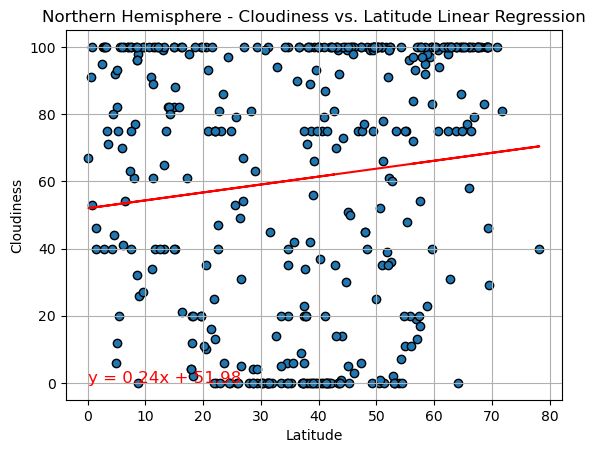

In [16]:
#Cloudiness vs. Latitude Linear Regression - Northern Hemisphere
plot_linear_regression(northern_hemisphere["Lat"], northern_hemisphere["Cloudiness"], "Northern Hemisphere - Cloudiness vs. Latitude Linear Regression", "Latitude", "Cloudiness")
#Analysis
#The linear regression model for the Northern Hemisphere shows no correlation between latitude and cloudiness.

R² = 0.0198


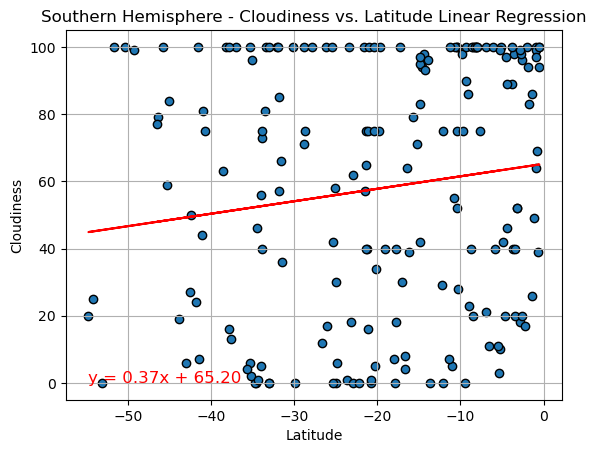

In [17]:
#Cloudiness vs. Latitude Linear Regression - Southern Hemisphere
plot_linear_regression(southern_hemisphere["Lat"], southern_hemisphere["Cloudiness"], "Southern Hemisphere - Cloudiness vs. Latitude Linear Regression", "Latitude", "Cloudiness")
#Analysis
#The linear regression model for the Southern Hemisphere shows no correlation between latitude and cloudiness.


R² = 0.0066


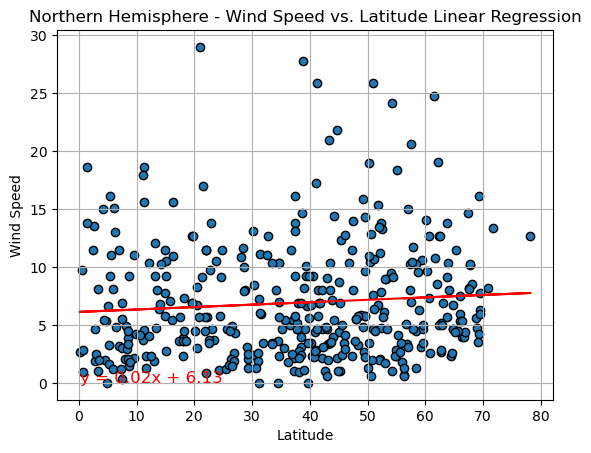

In [18]:
#Wind Speed (mph) vs. Latitude Linear Regression - Northern Hemisphere
plot_linear_regression(northern_hemisphere["Lat"], northern_hemisphere["Wind Speed"], "Northern Hemisphere - Wind Speed vs. Latitude Linear Regression", "Latitude", "Wind Speed")
#Analysis
#   The linear regression model for the Northern Hemisphere shows no correlation between latitude and wind speed.

R² = 0.0756


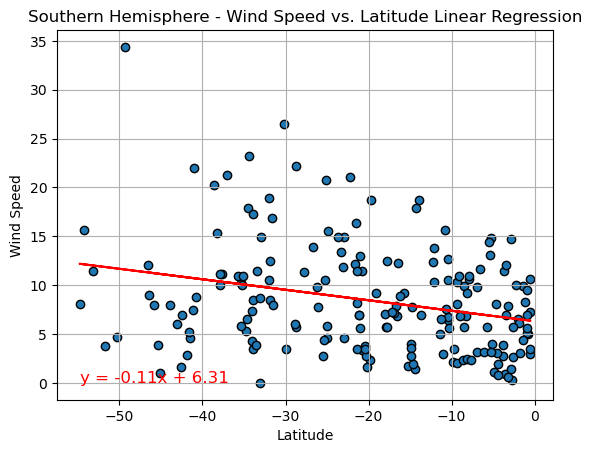

In [19]:
#Wind Speed (mph) vs. Latitude Linear Regression - Southern Hemisphere
plot_linear_regression(southern_hemisphere["Lat"], southern_hemisphere["Wind Speed"], "Southern Hemisphere - Wind Speed vs. Latitude Linear Regression", "Latitude", "Wind Speed")
#Analysis
#  The linear regression model for the Southern Hemisphere shows no correlation between latitude and wind speed.
